In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import time 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Load the datasetata = "usedcars.csv"
train_data = 'test_data.csv'
train = pd.read_csv(train_data)

test_data = 'test_data.csv'
test = pd.read_csv(test_data)

In [3]:
X_train = train.drop(['price'], axis=1)
y_train = train['price']
X_test = test.drop(['price'], axis=1)
y_test = test['price']

In [4]:
X_train

,isOneOwner,mileage,year,displacement,trim
0,0,92.650,2008,5.5,7.0
1,0,26.349,2011,5.5,7.0
2,0,24.670,2010,5.5,7.0
3,1,38.425,2007,5.5,7.0
4,1,117.038,2007,5.5,7.0
...,...,...,...,...,...
4008,0,58.356,2007,5.5,7.0
4009,0,79.801,2008,5.5,7.0
4010,1,17.260,2012,4.6,7.0
4011,0,63.189,2009,5.5,7.0


In [5]:
# Train the knn regression model
neigh = KNeighborsRegressor(n_neighbors=2)
start_knn = time.time()
neigh.fit(X_train, y_train)
stop_knn = time.time()
y_pred_knn = neigh.predict(X_test)

print(stop_knn - start_knn)


mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Print the results
print("\nknn regression:")
print(f"MSE: {mse_knn:.2f}, RMSE: {rmse_knn:.2f}, R-squared: {r2_knn:.2f}, MAE: {mae_knn:.2f}")

0.027127981185913086

knn regression:
MSE: 9.23, RMSE: 3.04, R-squared: 0.97, MAE: 2.12


In [6]:
y1pred = neigh.predict(X_test) # predicting test data
y1_hat = neigh.predict(X_train) # predicting train data

Text(0, 0.5, 'yhat')

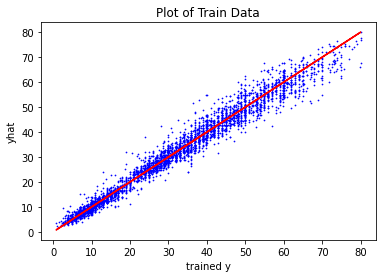

In [7]:
# plotting trained price v/s predicted trained price
plt.title("Plot of Train Data")
plt.scatter(y_train,y1_hat,s=0.5,c='b')
plt.plot(y_train,y_train,c='red')
plt.xlabel('trained y'); plt.ylabel('yhat')

Text(0.5, 1.0, 'KNN (with SelectKBest)')

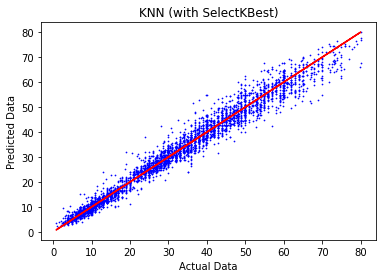

In [9]:
# plotting tested price v/s predicted tested price
plt.scatter(y_test,y1pred,s=0.5,c='b')
plt.plot(y_test,y_test,c='r')
plt.xlabel('Actual Data'); plt.ylabel('Predicted Data')
plt.title("KNN (with SelectKBest)")